https://www.kaggle.com/datasets/brsdincer/personality-scale-analysis

In [1]:
# Import libraries and dependencies
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [3]:
csv_data = pd.read_csv("../data/psyc.csv")
csv_data.head()

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible


<font color="blue">
<b>Personality Scale Analysis </b><br>
Scoring-based personality scale analysis<br>

gender -- Male / Female<br>
age -- Age<br>
openness -- Openness score from 1 to 9<br>
neuroticism -- Neuroticism score from 1 to 9<br>
conscientiousness -- Conscientiousness score from 1 to 9<br>
agreeableness -- Agreeablenes score from 1 to 9<br>
extraversion -- Extraversion score from 1 to 9<br>
Personality -- Dependable, Serious, Responsible, Extraverted, Lively<br>
<br>
Target dependent variable:<br>
Personality
</font>

### Data cleaning and exploratory analysis

In [4]:
csv_data.isnull().sum()

gender               0
age                  0
openness             0
neuroticism          0
conscientiousness    0
agreeableness        0
extraversion         0
Personality          0
dtype: int64

<AxesSubplot:>

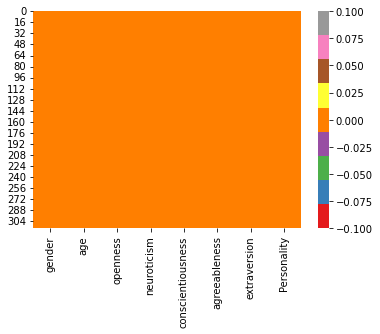

In [5]:
sns.heatmap(csv_data.isnull(), cmap='Set1')

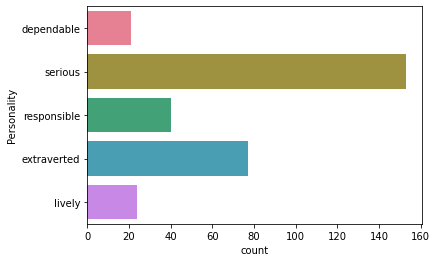

In [6]:
sns.countplot(y=csv_data["Personality"],palette="husl")
plt.show()

In [7]:
plt.savefig("../images/pc_bar.png")

<Figure size 432x288 with 0 Axes>

In [8]:
csv_data.describe()

,age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,20.244444,4.850794,4.584127,4.812698,4.844444,4.926984
std,2.616811,1.537211,1.818623,1.786315,1.718555,1.466527
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,3.000000,4.000000,4.000000,4.000000
50%,20.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,22.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,9.000000,9.000000,8.000000,8.000000


<AxesSubplot:>

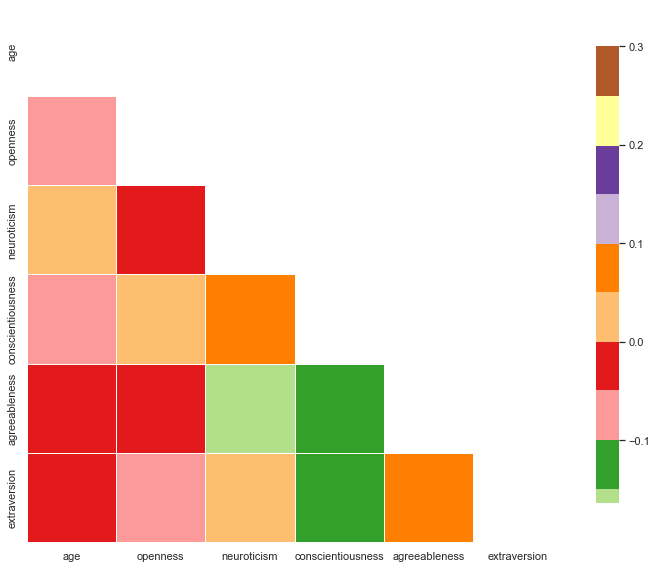

In [9]:
corr = csv_data.corr()

#Generate correlation graph
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="Paired", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .7})

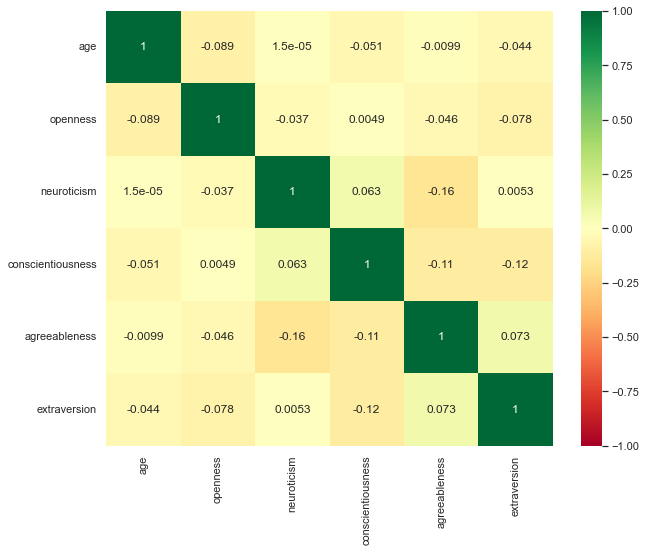

In [10]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)

plt.show()

In [11]:
plt.savefig("../images/pc_heatmap.png")

<Figure size 432x288 with 0 Axes>

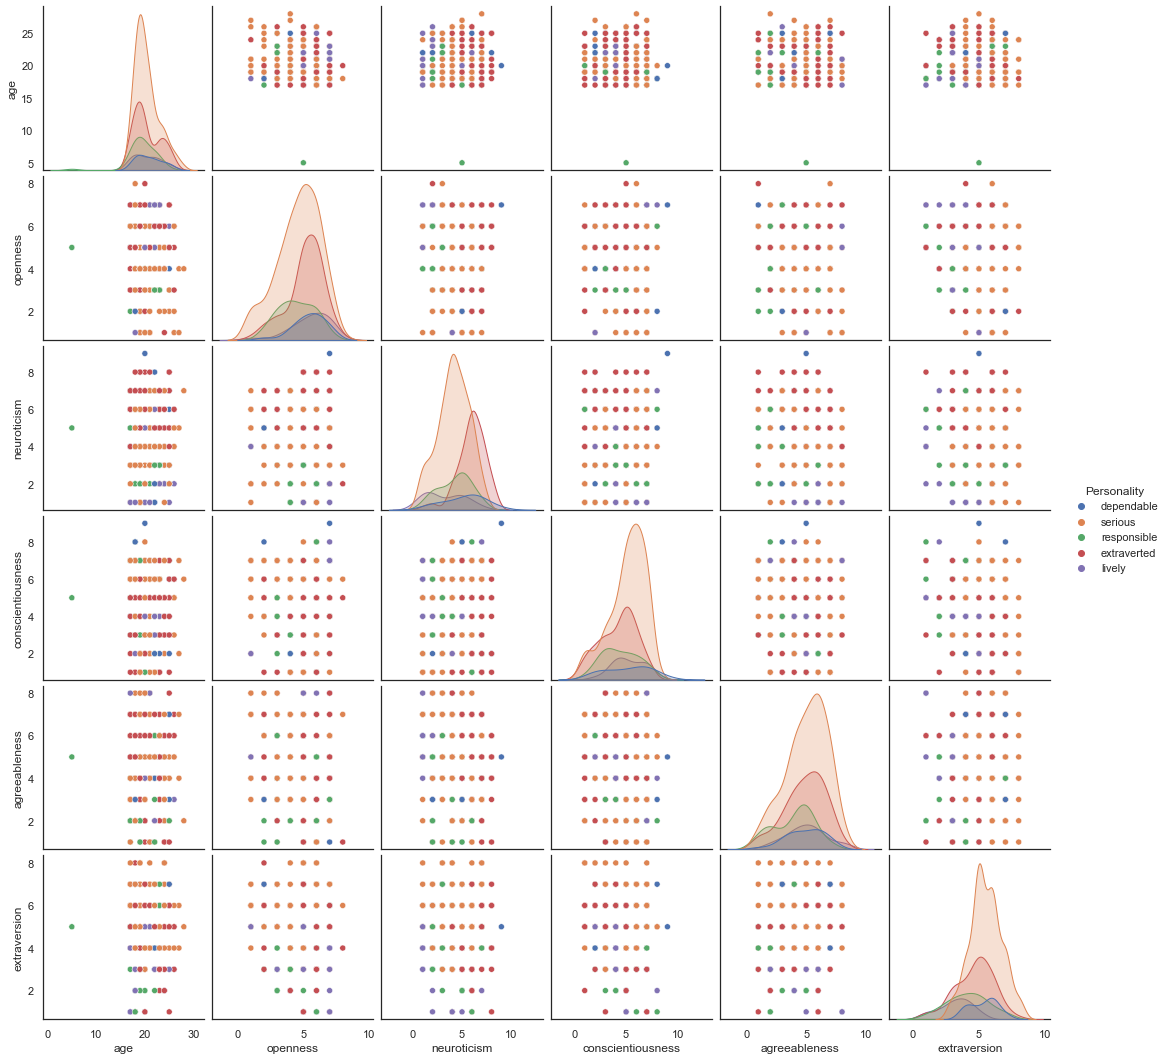

In [10]:
sns.pairplot(csv_data,hue='Personality')

In [12]:
plt.savefig("../images/pc_pairplot.png")

<Figure size 432x288 with 0 Axes>

In [17]:
fig= px.scatter(csv_data, x='Personality', y='age', size="age", 
           color='gender',
           title="Gender vs Age")

fig

In [19]:
fig.write_html("../images/pc_scatter.html")

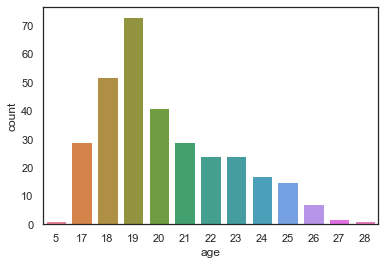

In [22]:
sns.countplot(x=csv_data["age"],palette="husl")
plt.show()

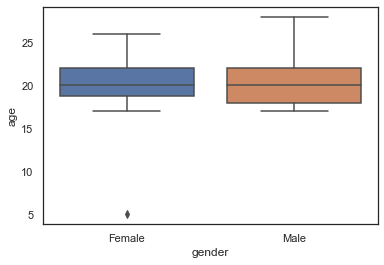

In [23]:
ax = sns.boxplot(x="gender", y="age", data=csv_data)

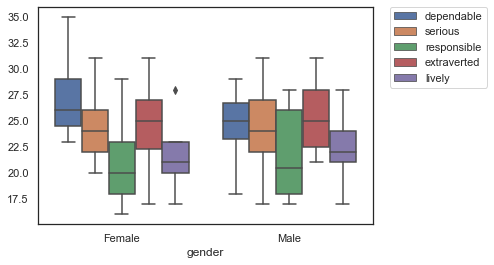

In [24]:
total_personalities =  csv_data["openness"] + csv_data["neuroticism"] + \
                    csv_data["conscientiousness"] + csv_data["agreeableness"] + csv_data["extraversion"]

sns.boxplot(y=total_personalities,x="gender",hue="Personality",data=csv_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [25]:
plt.savefig("../images/pc_box.png")

<Figure size 432x288 with 0 Axes>

In [15]:
# Locate the outlier as found by the boxplot above
csv_data.groupby(by="gender").min()

,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
gender,,,,,,,
Female,5,1,1,1,1,1,dependable
Male,17,1,1,1,1,1,dependable


In [16]:
# Remove the outlier in the age column
csv_data = csv_data.drop(csv_data['age'].idxmin())
csv_data.groupby(by="gender").min()

,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
gender,,,,,,,
Female,17,1,1,1,1,1,dependable
Male,17,1,1,1,1,1,dependable


### Data pre-processing

In [54]:
# Clone the dataframe
df = csv_data.reset_index(drop=True).copy()
df.head(2)

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious


In [55]:
# Encode "gender" column to binary numbers
# df = pd.get_dummies(csv_data, columns=["gender"])
# df.head()

In [56]:
# Manually categorised the gender column. i.e. not using get_dummies encoder
# to prevent the split in column gender for male & female, such as gender -> gender_Female and gender_Male column
df.loc[df['gender'] == 'Female', 'gender',] = 1
df.loc[df['gender'] == 'Male', 'gender',] = 0

# Categorised Personality column
df.loc[df['Personality'] == 'dependable', 'Personality',] = 0
df.loc[df['Personality'] == 'extraverted', 'Personality',] = 1
df.loc[df['Personality'] == 'lively', 'Personality',] = 2
df.loc[df['Personality'] == 'responsible', 'Personality',] = 3
df.loc[df['Personality'] == 'serious', 'Personality',] = 4

In [57]:
# Conver the gender & Personality columns into numeric
df['Personality'] = pd.to_numeric(df['Personality'])
df["gender"]= pd.to_numeric(df['gender'])
df.head(2)

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,1,20,7,9,9,5,5,0
1,0,17,5,4,5,2,4,4


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             314 non-null    int64
 1   age                314 non-null    int64
 2   openness           314 non-null    int64
 3   neuroticism        314 non-null    int64
 4   conscientiousness  314 non-null    int64
 5   agreeableness      314 non-null    int64
 6   extraversion       314 non-null    int64
 7   Personality        314 non-null    int64
dtypes: int64(8)
memory usage: 19.8 KB


In [59]:
# Get X, y data from the dataframe & check the shape of them
y = df['Personality']
# y = y.astype('int')
X = df.drop('Personality', axis=1)
print(f"df.shape ", df.shape)
print(f"X.shape ", X.shape)
print(f"y.shape ", y.shape)

df.shape  (314, 8)
X.shape  (314, 7)
y.shape  (314,)


### Build and select the most accuracy model

##### Model1: Logistic regression for feature importance

Feature: 0, Score: -0.61865
Feature: 1, Score: -0.04892
Feature: 2, Score: 0.09475
Feature: 3, Score: 0.01637
Feature: 4, Score: -0.06474
Feature: 5, Score: -0.06204
Feature: 6, Score: 0.36202


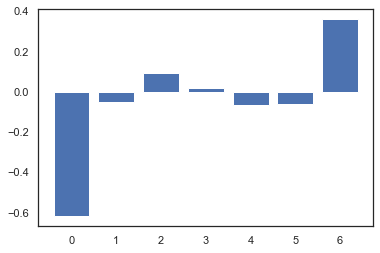

Training Data Score:  75.24 %
Testing Data Score: 66.35 %


In [60]:
# Model 1: Logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# define the model
model = LogisticRegression()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)

# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

In [61]:
pred = model.predict(X_test)
# Print classfication report
print(classification_report(y_test, model.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.48      0.76      0.59        21
           2       1.00      0.38      0.55         8
           3       0.33      0.14      0.20        14
           4       0.77      0.89      0.83        54

    accuracy                           0.66       104
   macro avg       0.52      0.43      0.43       104
weighted avg       0.62      0.66      0.62       104



In [62]:
from sklearn.metrics import mean_squared_error, r2_score
# Print r2 and mse scores
y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
r2 = model.score(X_test, y_test)
print(f"mse: {mse}")
print(f"r2: {r2}")

mse: 1.6538461538461537
r2: 0.6634615384615384


##### Model 2: Decision tree classifier for feature importance on a classification problem

Feature: 0, Score: 0.08924
Feature: 1, Score: 0.13395
Feature: 2, Score: 0.14347
Feature: 3, Score: 0.15840
Feature: 4, Score: 0.19069
Feature: 5, Score: 0.08533
Feature: 6, Score: 0.19892


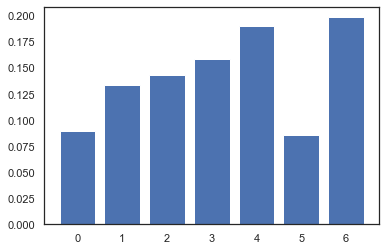

Training Data Score:  99.52 %
Testing Data Score: 50.96 %


In [63]:
# Model 2: Decision tree classifier for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# define the model
model = DecisionTreeClassifier()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

In [64]:
pred = model.predict(X_test)
# Print classfication report
print(classification_report(y_test, model.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.52      0.62      0.57        21
           2       0.22      0.25      0.24         8
           3       0.29      0.36      0.32        14
           4       0.73      0.61      0.67        54

    accuracy                           0.51       104
   macro avg       0.35      0.37      0.36       104
weighted avg       0.54      0.51      0.52       104



In [65]:
from sklearn.metrics import mean_squared_error, r2_score
# Print r2 and mse scores
y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
r2 = model.score(X_test, y_test)
print(f"mse: {mse}")
print(f"r2: {r2}")

mse: 2.701923076923077
r2: 0.5096153846153846


##### Model 3: Random forest classifier for feature importance on a classification problem

Feature: 0, Score: 0.07786
Feature: 1, Score: 0.14047
Feature: 2, Score: 0.13563
Feature: 3, Score: 0.20424
Feature: 4, Score: 0.14963
Feature: 5, Score: 0.11121
Feature: 6, Score: 0.18096


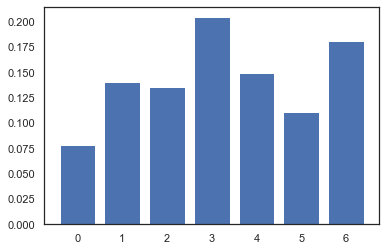

Training Data Score:  99.52 %
Testing Data Score: 69.23 %


In [66]:
# Model 3: Random forest classifier for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

In [67]:
pred = model.predict(X_test)
# Print classfication report
print(classification_report(y_test, model.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.56      0.86      0.68        21
           2       0.67      0.25      0.36         8
           3       0.57      0.29      0.38        14
           4       0.80      0.89      0.84        54

    accuracy                           0.69       104
   macro avg       0.52      0.46      0.45       104
weighted avg       0.66      0.69      0.65       104



In [68]:
from sklearn.metrics import mean_squared_error, r2_score
# Print r2 and mse scores
y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
r2 = model.score(X_test, y_test)
print(f"mse: {mse}")
print(f"r2: {r2}")

mse: 1.6153846153846154
r2: 0.6923076923076923


##### Model 4: Xgboost classifier for feature importance on a classification problem

Feature: 0, Score: 0.18516
Feature: 1, Score: 0.10620
Feature: 2, Score: 0.11574
Feature: 3, Score: 0.18299
Feature: 4, Score: 0.12143
Feature: 5, Score: 0.10217
Feature: 6, Score: 0.18630


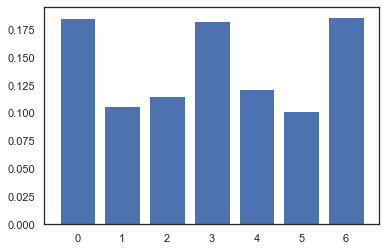

Training Data Score:  99.52 %
Testing Data Score: 65.38 %


In [69]:
# Model 4: Xgboost classifier for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve
# define the model
model = XGBClassifier()      

y = y.astype('int')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

In [70]:
pred = model.predict(X_test)
# Print classfication report
print(classification_report(y_test, model.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.62      0.86      0.72        21
           2       0.43      0.38      0.40         8
           3       0.38      0.43      0.40        14
           4       0.82      0.76      0.79        54

    accuracy                           0.65       104
   macro avg       0.45      0.48      0.46       104
weighted avg       0.63      0.65      0.64       104



In [71]:
from sklearn.metrics import mean_squared_error, r2_score
# Print r2 and mse scores
y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
r2 = model.score(X_test, y_test)
print(f"mse: {mse}")
print(f"r2: {r2}")

mse: 1.5192307692307692
r2: 0.6538461538461539


#### The model that has the highest accuracy rate is: Model 3: Random forest classifier for feature importance on a classification problem</b>

Feature: 0, Score: 0.07382
Feature: 1, Score: 0.14017
Feature: 2, Score: 0.13313
Feature: 3, Score: 0.20226
Feature: 4, Score: 0.15502
Feature: 5, Score: 0.11153
Feature: 6, Score: 0.18408


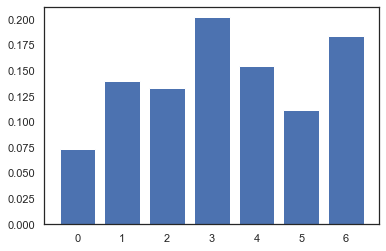

Training Data Score:  99.52 %
Testing Data Score: 69.23 %


In [72]:
# Model 3: Random forest classifier for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

### Save the trained model to pickle file

In [73]:
# Create pickle file
knnPickle = open('../models/RFCmodel_personality_prediction', 'wb') 

# Save the trained model to file
pickle.dump(model, knnPickle)      
knnPickle.close()

### Load the trained model

In [74]:
# Open & load the model using pickle
with open('../models/RFCmodel_personality_prediction' , 'rb') as f:
    loaded_model = pickle.load(f)

### Simulate user input with new data

In [75]:
user_input = {"gender": 1,"age": 40, "openness": 9, "neuroticism": 4, "conscientiousness": 4, 
              "agreeableness": 4, "extraversion": 4}
user_input = pd.DataFrame(user_input, index=[0])
user_input

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion
0,1,40,9,4,4,4,4


In [76]:
user_input = user_input.values.reshape(1, -1)
user_input

array([[ 1, 40,  9,  4,  4,  4,  4]], dtype=int64)

In [77]:
ML_guess = loaded_model.predict(user_input) 
ML_guess 

array([1])

In [78]:
# Mapped Personality category
if np.array(ML_guess) == 0:
    ML_guess = "Dependable"
elif np.array(ML_guess) == 1:
    ML_guess = "Extraverted"
elif np.array(ML_guess) == 2:
    ML_guess = "Lively"
elif np.array(ML_guess) == 3:
    ML_guess = "Responsible"
else:
    ML_guess = "Serious"

In [79]:
print(f"ML predicted your personality is: ", ML_guess)

ML predicted your personality is:  Extraverted
